## Introduction to Regression with Neural Networks in TensorFlow

Regression -> Predicting a number based on a set of predictors

In [1]:
import tensorflow as tf

## Creating data to view and fit

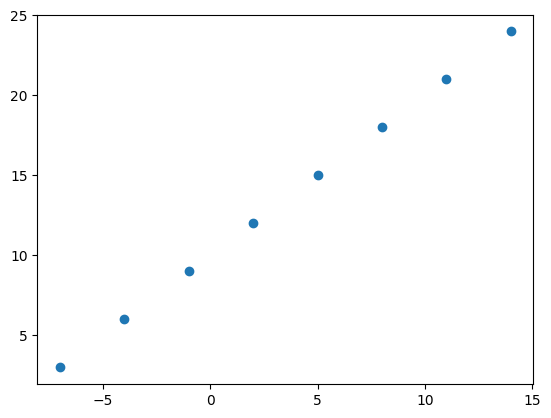

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])


# Visualize
plt.scatter(X,y)
plt.show()

In [4]:
# Underlying relationship
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [6]:
# Create a demo tensor for housing price prediciton problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [14]:
input_shape = X[0].shape
output_shape = y[0].shape
# Scalars have 0 dimensions
input_shape, output_shape

((), ())

In [15]:
X[0], y[0]

(-7.0, 3.0)

In [20]:
# Turn our NumPy arrays into Tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [21]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

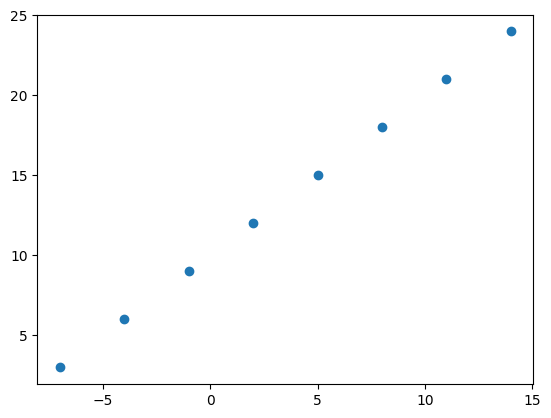

In [22]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compile a model** - define the loss function (in other words, the function that tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns it is learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X and y

In [38]:
# Set random seed
tf.random.set_seed(42)

# need to expand dimensions
test = X[..., tf.newaxis]

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean-absolute-error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=['mae'])

# 3. Fit the model
history = model.fit(test, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 336ms/step - loss: 9.7709 - mae: 9.7709
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 9.6384 - mae: 9.6384
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 9.5059 - mae: 9.5059
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 9.3734 - mae: 9.3734
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 9.2409 - mae: 9.2409


In [40]:
# Try and make a prediction using the model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 42ms/step


array([[21.138004]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here, we mgiht add more layers/ increase number of hidden units (neurons), change the activation function of each layer
2. **Compiling a model** - here, we might change the optimization function or the **learning rate** of the optimization function
3. **Fitting a model** - here, we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

In [48]:
# Let's rebuild the model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer='sgd',
              metrics=['mae'])

# 3. Fit the model (this time we'll train for longer)
model.fit(X[..., tf.newaxis], y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 334ms/step - loss: 12.7775 - mae: 12.7775
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 12.6450 - mae: 12.6450
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 12.5125 - mae: 12.5125
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 12.3800 - mae: 12.3800
Epoch 5/100
1/1 [==============================] - 0s 25ms/step - loss: 12.2475 - mae: 12.2475
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 12.1150 - mae: 12.1150
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 11.9825 - mae: 11.9825
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 11.8500 - mae: 11.8500
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 11.7175 - mae: 11.7175
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 11.5850 - mae: 11.5850
Epoch 11/100
1/1 [==============================] - 0s 

In [49]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [50]:
# Let's see if our model's prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 71ms/step


array([[29.951605]], dtype=float32)

In [59]:
# Let's see if we can improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# 3. Fit the model
model.fit(X[..., tf.newaxis], y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 594ms/step - loss: 12.1179 - mae: 12.1179
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.3846 - mae: 11.3846
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 10.6422 - mae: 10.6422
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 9.8895 - mae: 9.8895
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 9.1249 - mae: 9.1249
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 8.3469 - mae: 8.3469
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 7.5538 - mae: 7.5538
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 6.9299 - mae: 6.9299
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 7.0101 - mae: 7.0101
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 7.2837 - mae: 7.2837
Epoch 11/100
1/1 [==============================] - 0s 9ms/step 

In [60]:
model.predict([17.0])

1/1 [==============================] - 0s 73ms/step


array([[26.4174]], dtype=float32)

### Evaluating a model

In practice, a typle workflow you'll go through when building neural network is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak it -> ...
```

When it comes to evaluation...

> Visualizing is very important

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learn?
* The predictions of a model - how does the predicitons line up against the ground truth

In [61]:
# Make a bigger data set
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [62]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

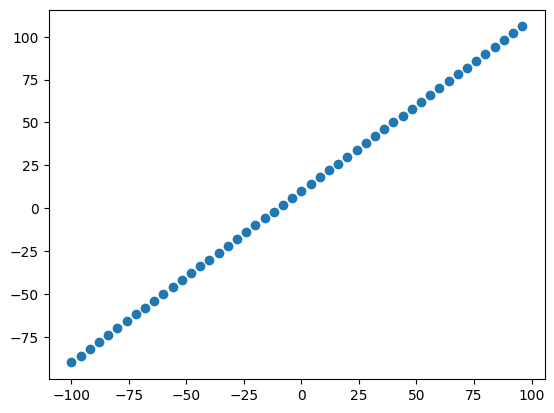

In [63]:
# Visualize the data
plt.scatter(X, y)

### The 3 sets are
1. **Training set** - the model learns from this set ~70-80% of the data
2. **Validation Set** - the model gets tuned on this data, whcih is typically 10-15% of the data available
3. **Testing Set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available

In [64]:
# Check the length of how many samples we have
len(X)

50

In [66]:
# Split the data into train and test sets
X_train = X[:40] # 80% of the data
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize again

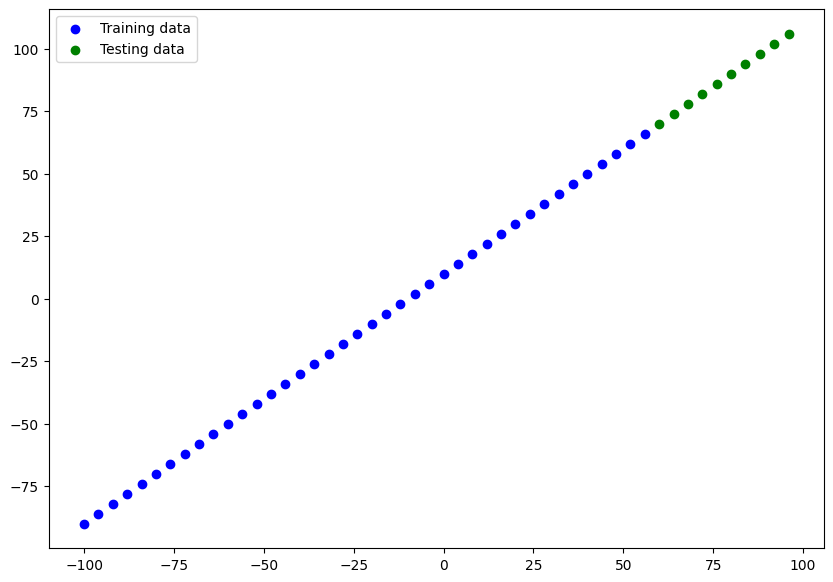

In [69]:
plt.figure(figsize=(10,7))

# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show a legend
plt.legend()

In [72]:
# Let's have a look at how to build a neural network for our data

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer='sgd',
              metrics=['mae'])

# 3. Fit the model (this time we'll train for longer)
# model.fit(X_train[..., tf.newaxis], y_train, epochs=100)

### Visualizing the model

In [74]:
model.summary()

ValueError: You must provide an `input_shape` argument.

In [114]:
# Let's create a model that build automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # pass in 1 number to predict 1 number
], name='model_1')

# 2. Compile the model
model.compile(loss='mae',
              optimizer='sgd',
              metrics=['mae'])

model.summary() # since input_shape = (1), only need to learn the bias and 1 weight

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable parameters - these are the parameters (patterns) the model can update as it trains
* Non-trainable parameters - these parameters aren't updated during training (this is typical during **transfer learning**)

In [115]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

# if input shape is not defined, then need to increase the dimensions so that X[0] is not a scalar

In [116]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


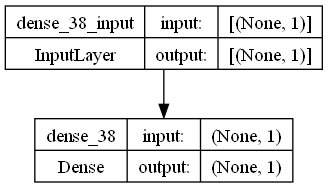

In [117]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing model's predictions

To visualize predictions, good idea to plot them against the ground truth labels.

Often, will see this in form of `y_test` or `y_true` vs `y_pred` (ground truth vs model's prediction)

In [118]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 58ms/step


array([[56.47196 ],
       [60.15284 ],
       [63.83372 ],
       [67.5146  ],
       [71.19548 ],
       [74.876366],
       [78.55724 ],
       [82.23812 ],
       [85.91901 ],
       [89.599884]], dtype=float32)

In [119]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

**Note:** Good idea to create a function if the functionality will be reused

In [124]:
# Let's create a plotting function
def plot_predictions(train_data=X_train, train_labels=y_train,
                     test_data=X_test, test_labels=y_test,
                     predictions= y_pred):
    '''
    Plots training data, test data and compares predictions to ground truth
    '''
    
    plt.figure(figsize=(10,7))
    # Plot trianing data in blue
    plt.scatter(train_data, train_labels, c='b', label='Training data')
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c='g', label='Testing data')
    # Plot model's predictions
    plt.scatter(test_data, predictions, c='r', label='Predictions')
    plt.legend()

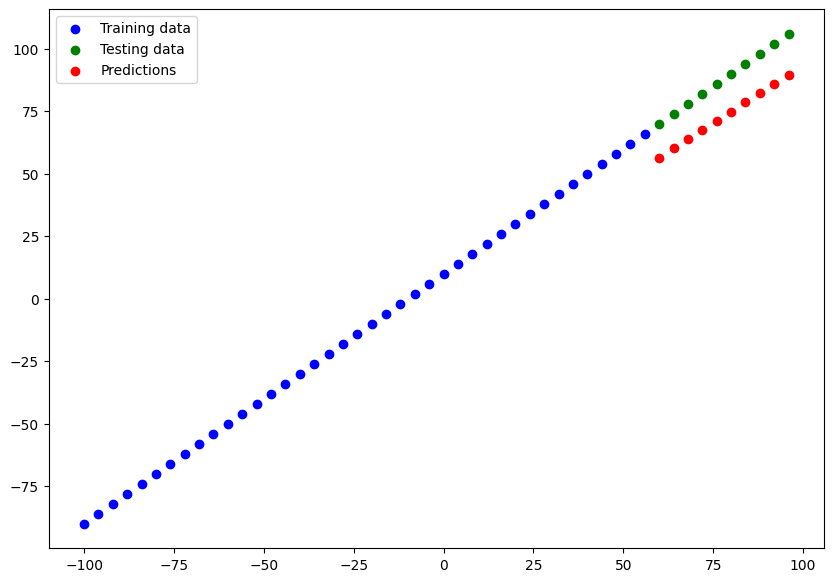

In [126]:
plot_predictions(train_data=X_train, train_labels=y_train,
                 test_data=X_test, test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem we are working on, there are different evaluation metrics to evaluate the model's performance

On regression, there are 2 main metrics:
* MAE - mean absolute error
* MSE - mean squared error
* Huber - combination of MAE and MSE (less sensitive to outliers than MSE)

In [138]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 30ms/step - loss: 14.9641 - mae: 14.9641
[14.964077949523926, 14.964077949523926]


<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96])>

In [139]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=14.964078>

In [141]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=224.76376>

In [159]:
# Make function to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

### Running experiements to improve our model

```
Workflow of building a model is to do trial and error in the positive direction
```

1. Get more data - get more examples for model to train on (more opportunities to learn patterns or relationships between features and labels)
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give model more of a chance to find patterns in the data

Let's do 3 modelling expriements

1. `model_1` - same as original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1`**

In [150]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mean_absolute_error,
                optimizer='sgd',
                metrics=['mae'])

# 3. Fit the model
model_1.fit(X_train[..., tf.newaxis], y_train, epochs=100) # have to expand dimensions becaues X[0].ndim = 0 but must be 1

Epoch 1/100
2/2 [==============================] - 0s 14ms/step - loss: 32.1701 - mae: 32.1701
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 7.5534 - mae: 7.5534
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 7.9688 - mae: 7.9688
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 7.9490 - mae: 7.9490
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.2319 - mae: 10.2319
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4874 - mae: 9.4874
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.6186 - mae: 8.6186
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0515 - mae: 9.0515
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 18.8659 - mae: 18.8659
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1802 - mae: 10.1802
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - loss

1/1 [==============================] - 0s 50ms/step


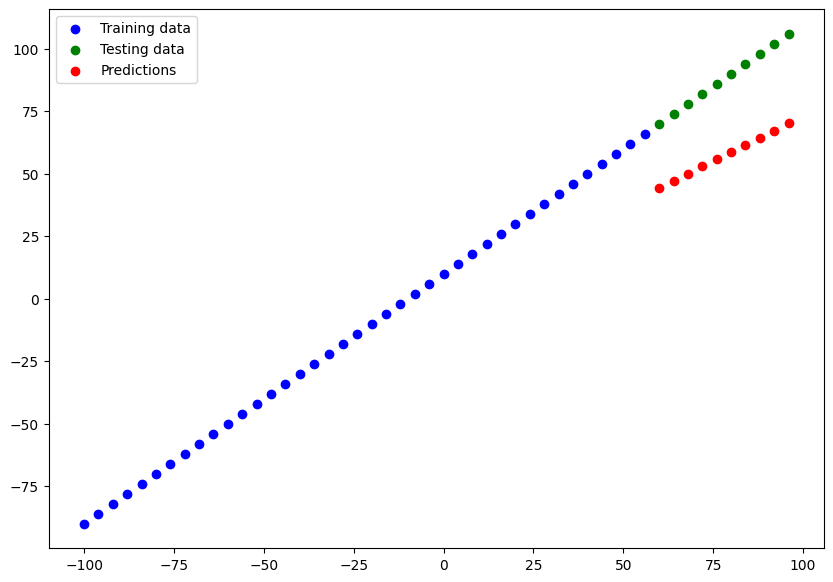

In [154]:
# Make and plot predictions for model_1
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [158]:
y_test.shape, y_pred_1.shape, tf.squeeze(y_pred_1).shape

(TensorShape([10]), (10, 1), TensorShape([10]))

In [160]:
# Calculate model_1 evaluation metrics, need to rmb to squeeze y_pred_1 to get them to the same shape
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.754541>,
 <tf.Tensor: shape=(), dtype=float32, numpy=956.383>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [175]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer='sgd',
                metrics=['mse'])

# 3. Fit the model
model_2.fit(X_train[..., tf.newaxis], y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 13ms/step - loss: 41.1214 - mse: 2513.7793
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 24.4125 - mse: 777.2845
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 28.9649 - mse: 1269.5255
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 13.1011 - mse: 238.1266
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 16.7136 - mse: 372.8980
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.3274 - mse: 144.3050
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 12.3775 - mse: 199.4928
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 10.9719 - mse: 142.1579
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 38.9897 - mse: 2367.6118
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 26.5780 - mse: 992.9056
Epoch 11/100
2/2 [===========================

1/1 [==============================] - 0s 55ms/step


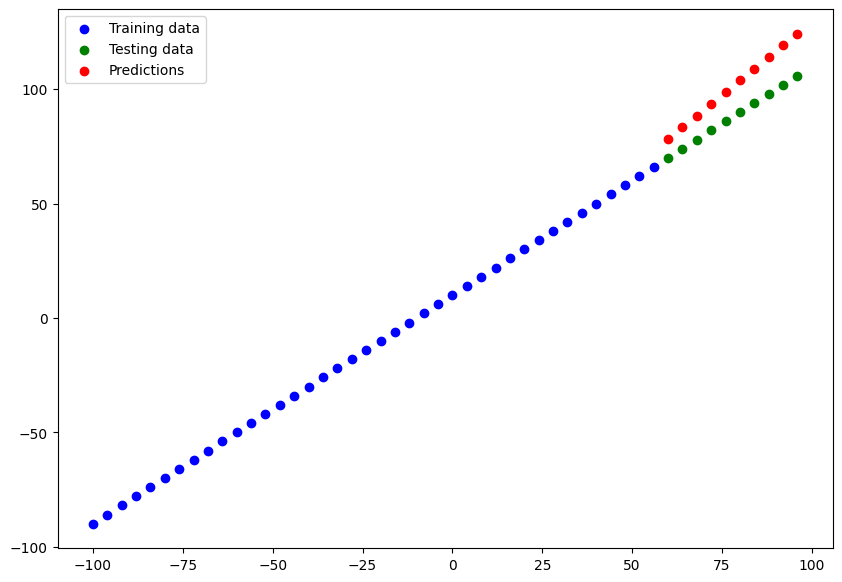

In [176]:
# Get the predictions and plot them for model_2
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [177]:
# Get the evalutaion metrics for model_2
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=13.282697>,
 <tf.Tensor: shape=(), dtype=float32, numpy=186.5082>)

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [179]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer='sgd',
                metrics=['mae'])

# 3. Fit model
model_3.fit(X_train[..., tf.newaxis], y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 10ms/step - loss: 51.8369 - mae: 51.8369
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 15.7010 - mae: 15.7010
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 18.5155 - mae: 18.5155
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 13.4699 - mae: 13.4699
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 14.8363 - mae: 14.8363
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 11.8021 - mae: 11.8021
Epoch 7/500
2/2 [==============================] - 0s 6ms/step - loss: 11.1303 - mae: 11.1303
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 11.0687 - mae: 11.0687
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 40.2031 - mae: 40.2031
Epoch 10/500
2/2 [==============================] - 0s 4ms/step - loss: 27.6301 - mae: 27.6301
Epoch 11/500
2/2 [==============================] - 0s 5ms

1/1 [==============================] - 0s 72ms/step


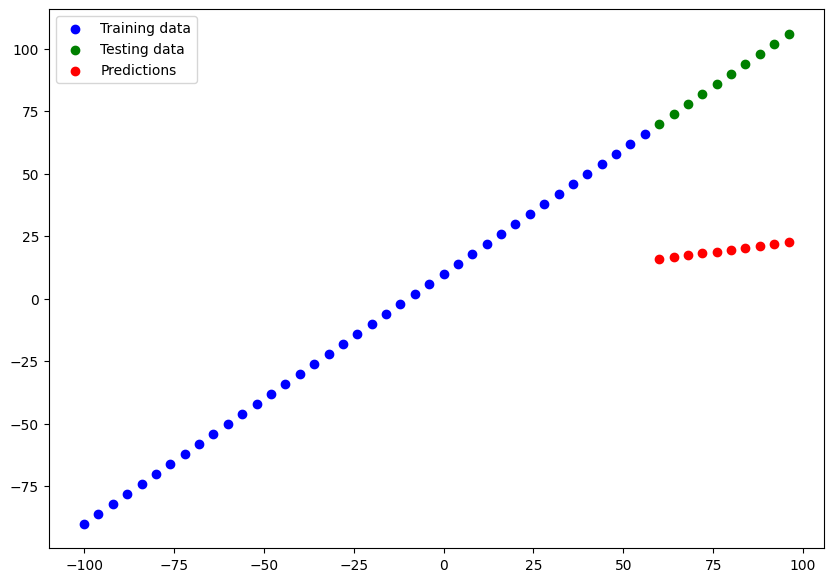

In [180]:
# Make and plot predictions
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [181]:
# Compute evaluation metrics
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.74205>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4812.0205>)

**Note:** Start with small experiments (small models) and make sure they work and then increase their size

## Comparing the results of our experiments

We've run a few experiments, let's compare our results

In [184]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,30.754541,956.382996
1,model_2,13.282697,186.508194
2,model_3,68.742050,4812.020508


Looks like `model_2` performed the best

In [185]:
model_2.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 10)                20        
                                                                 
 dense_52 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**Note:** One of the main goals is to minimize the time between experiments. The more experiments you do, the more things you'll figure out which don't work. Then, in turn, will get closer to figuring out what does work

## Tracking experiments

One really good habit in ML modelling is to track results of experiments.

And when doing so, it can be tedious if we are runnign lots of experiments.

Luckily there are tools to help us!

As we build more models, you can look to using:

* TensorBoard - a component of TensorFlow library to help track modelling experiments 
* Weights & Biases - a tool for tracking all kinds of machine learning experiments

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained)

There are two main formats we can save our models to:

1. SavedModel format
2. HDF5 format

In [186]:
# Save model using the SavedModel format
model_2.save('learning_model')

INFO:tensorflow:Assets written to: learning_model\assets


INFO:tensorflow:Assets written to: learning_model\assets


In [187]:
# Save model using the HDF5 format, need to use .h5 extension
model_2.save('learning_model_HDF5.h5')

## Loading in a saved model

In [190]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model('learning_model')
loaded_SavedModel_format.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 10)                20        
                                                                 
 dense_52 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [192]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_pred = model_2.predict(X_test)
loaded_SavedModel_format_pred = loaded_SavedModel_format.predict(X_test)
model_2_pred == loaded_SavedModel_format_pred

1/1 [==============================] - 0s 59ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [194]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model('learning_model_HDF5.h5')
loaded_h5_model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 10)                20        
                                                                 
 dense_52 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [195]:
model_2.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 10)                20        
                                                                 
 dense_52 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [197]:
# Check to see if loaded .h5 predictions match model_2
model_2_pred = model_2.predict(X_test)
loaded_h5_model_pred = loaded_h5_model.predict(X_test)
model_2_pred == loaded_h5_model_pred

1/1 [==============================] - 0s 25ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## A larger example

In [200]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [202]:
# Read in the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [204]:
# Trying one-hot encode DataFrame
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [207]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot.charges

In [208]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [209]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [210]:
# Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [213]:
# Build a neural network

# Set seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer='sgd',
                        metrics=['mae'])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8526.7031 - mae: 8526.7031
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7888.7114 - mae: 7888.7114
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7608.1875 - mae: 7608.1875
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7884.9395 - mae: 7884.9395
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7703.3442 - mae: 7703.3442
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7605.8525 - mae: 7605.8525
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7615.3477 - mae: 7615.3477
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7689.7974 - mae: 7689.7974
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7628.6152 - mae: 7628.6152
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7706.3022 - mae: 7706.3022

In [214]:
# Check the results of insurance model on test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7110.0454 - mae: 7110.0454


[7110.04541015625, 7110.04541015625]

In [217]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model is not performing too well... Let's try and improve it

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Same as above but train for longer (200 epochs)

In [223]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    # if loss is nan, something wrong with the model
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13284.0908 - mae: 13284.0908
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13091.2705 - mae: 13091.2705
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12703.8203 - mae: 12703.8203
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11965.7910 - mae: 11965.7910
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10772.7305 - mae: 10772.7305
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9310.3799 - mae: 9310.3799
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8036.9634 - mae: 8036.9634
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7503.2437 - mae: 7503.2437
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7427.4155 - mae: 7427.4155
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7407.2012 - mae:

In [224]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4620.5454 - mae: 4620.5454


[4620.54541015625, 4620.54541015625]

In [225]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7110.0454 - mae: 7110.0454


[7110.04541015625, 7110.04541015625]

In [226]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer='adam',
                          metrics=['mae'])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13322.7285 - mae: 13322.7285
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13181.5859 - mae: 13181.5859
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12876.1025 - mae: 12876.1025
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12257.0693 - mae: 12257.0693
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 11178.2939 - mae: 11178.2939
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9712.9316 - mae: 9712.9316
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8298.0137 - mae: 8298.0137
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7553.5312 - mae: 7553.5312
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7417.4546 - mae: 7417.4546
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7396.0405 - mae:

In [227]:
# Evaluate our thrid model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3494.8035 - mae: 3494.8035


[3494.803466796875, 3494.803466796875]

Text(0.5, 0, 'epochs')

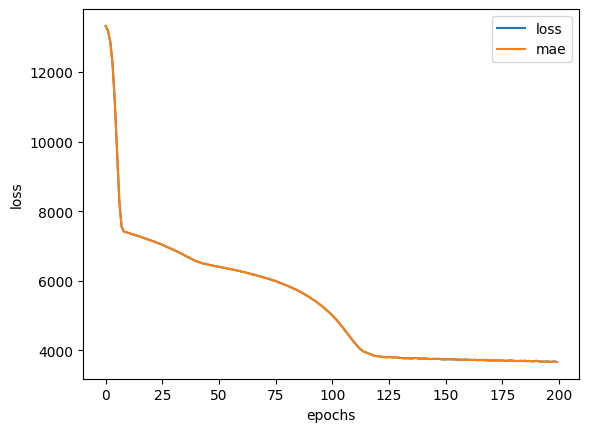

In [229]:
# Plot history (also know as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks thend to prefer normalization.

If you're not sure which to use, could try both and see which performs better

In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn

In [239]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # scale all these values to between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region']) 
)

# Create X and y 
X = insurance.drop('charges', axis=1)
y = insurance['charges']

# Build train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [240]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [243]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [244]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Data has been normalized and one hot encoded.

We can now build a neural network model on it

In [245]:
# Build a neural network model to fit on our normalized data

# Set seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss='mae',
                          optimizer='adam',
                          metrics=['mae'])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13343.2939 - mae: 13343.2939
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13333.6357 - mae: 13333.6357
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13310.0801 - mae: 13310.0801
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13261.9580 - mae: 13261.9580
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13178.1094 - mae: 13178.1094
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13047.3662 - mae: 13047.3662
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12859.3125 - mae: 12859.3125
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12603.9746 - mae: 12603.9746
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12271.3291 - mae: 12271.3291
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11859.59

In [246]:
# Evaluate insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3437.7371 - mae: 3437.7371


[3437.737060546875, 3437.737060546875]